# **Samsung Phone Specification Categorizer**
---
<img src="https://github.com/Misfit911/Samsung-Phone-Specification-Categorizer/assets/127237815/ee873031-85dc-4d6b-834d-2774174a038a" width="1100" height="500">

##### Author: Bradley Ouko
---

# **Overview**
---
By addressing the real-world challenge of understanding mobile phone success factors and setting an affordable price, Samsung can enhance its market position and customer satisfaction. The choice of the Spec_score_binary as the target variable aligns well with the project goals.

The evaluation results indicate strong model performance, especially with the decision tree and random forest classifiers. The perfect accuracy achieved by these models suggests that they are suitable for predicting whether a phone is high-spec or low-spec. The implications for Samsung include optimizing marketing strategies, resource allocation, and overall customer satisfaction.

# **Business Understanding**
---
# **Business Problem**
Samsung wants to launch a new product in the market. As a data scientist working for Samsung, I have been tasked to gain valuable insights from the dataset related to mobile phones. That way, it can gain an understanding of the factors that contribute to a phone’s success or failure and hence set an affordable price that will increase sales. The goal is to drive sales up📈 by offering a high spec product at an affordable price. Samsung wants to know which features will cost less to produce and have a high profit margin as well as when sold.

## **Stakeholders**
1. **Samsung Product Team:**
    * They can use the insights to enhance product features, prioritize improvements, and optimize marketing strategies.

    * **Team Goal:** Improve Samsung’s market share and customer satisfaction.

2. **Sales and Marketing Teams:**
    * They can leverage the findings to tailor advertising campaigns, target specific customer segments, and highlight key features.

    * **Team Goal:** Increase sales and revenue.

3. **Consumers and Potential Buyers:**
    * They benefit indirectly from better products and informed purchasing decisions.

    * **Team Goal:** Make informed choices when buying a phone.

### **Conclusion**
The project’s implications lie in improving Samsung’s competitiveness, understanding customer preferences, and driving innovation. By addressing this problem, Samsung is able to enhance user experiences and hence its success.✅

# **Data Understanding**
---

## **Dataset Suitability**
The dataset is suitable for the project because it contains relevant information about mobile phones, including specifications, ratings, prices, and features. It covers various aspects that impact a phone’s success in the market.

## **Feature Justification**
1. **Rating**: Captures user satisfaction, which directly affects sales and brand reputation.

2. **Spec_score**: Reflects technical specifications, influencing perceived value.

3. **Price**: Critical for consumer decisions.

4. **Company**: Brand reputation plays a significant role.

5. **Android_version**: Relevant for software compatibility and user experience.

6. **Battery, Camera, RAM, Display**: Key features affecting user satisfaction.

7. **Fast Charging**: A desirable feature.

8. **Processor**: Influences performance.

9. **External_Memory, Inbuilt_memory**: Storage options matter to users.

10. **Screen_resolution**: Affects display quality.

### **Limitations**
1. **Subjectivity**: Ratings are subjective and may not fully represent technical quality.

2. **Missing Data**: Check for missing values and handle them appropriately.

3. **Market Trends**: The dataset might not capture recent trends.

## **Project Objectives**
### **Main Objective:**
Create a machine learning model that predicts the specification rating based on the features. This can comes in handy when the stakeholders want to know which product features are ideal for their new product launch campaign.🚀

**Specific Objectives:**
1. **Feature Selection and Exploration:**
    * Explore relationships between features and the chosen target variable.
    * Identify relevant features for model training.

2. **Model Building and Evaluation:**
    * Develop and evaluate machine learning models (e.g., logistic regression, decision trees, random forests) using the selected target variable.
    * Optimize model performance using appropriate metrics (accuracy, precision, recall, etc.).

3. **Interpretability and Insights:**
    * Interpret model results to understand feature importance.
    * Provide actionable insights for Samsung’s product team.

**Target Variable**

- `Spec_score_binary` is the target variable.

- This binary variable classifies phones as either `High-Spec`(spec_score >= 70) or `Low-Spec`. It directly reflects user satisfaction and guides on product improvements and Quality Control.

*Let's dive into it!*

![dive ](https://github.com/Misfit911/Samsung-Phone-Specification-Categorizer/assets/127237815/7213b699-4bc3-4b40-b4a1-6d8421af0cd8)

*Import modules*

In [1]:
#import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import necessary modules for df for Modelling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Imbalanced correction
from imblearn.over_sampling import SMOTE

# Models
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import modeling toolkit
import mods
from mods import DataSourcing, DataPreprocessing, DataAnalysis, DataModeling

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, f1_score, precision_score

# Plot_roc_curves
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, auc

# Filter warnings
import warnings
warnings.filterwarnings('ignore')


*Load the data set.*

In [2]:
# Call the DataSourcing() class
load = DataSourcing()
data = load.open_file('data\mobile_phone_data.csv')
load.dataframe_details(data)

DATAFRAME SHAPE: (1370, 18)


DATAFRAME HEAD:
   Index                                  Name  Rating  Spec_score  \
0      0                 Samsung Galaxy F14 5G    4.65          68   
1      1                    Samsung Galaxy A11    4.20          63   
2      2                    Samsung Galaxy A13    4.30          75   
3      3                    Samsung Galaxy F23    4.10          73   
4      4  Samsung Galaxy A03s (4GB RAM + 64GB)    4.10          69   

                       No_of_sim       Ram            Battery     Display  \
0  Dual Sim, 3G, 4G, 5G, VoLTE,   4 GB RAM  6000 mAh Battery   6.6 inches   
1      Dual Sim, 3G, 4G, VoLTE,   2 GB RAM  4000 mAh Battery   6.4 inches   
2      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.6 inches   
3      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM   6000 mAh Battery  6.4 inches   
4      Dual Sim, 3G, 4G, VoLTE,   4 GB RAM  5000 mAh Battery   6.5 inches   

                                              Camera  \
0    50 MP + 2

# **Data Preparation**
---
## **Data Cleaning**

### Dealing with missing values
*Check for missing values*

In [3]:
# Initialize data preprocessing
dp = DataPreprocessing()

# Use the methods to perform the desired data processing tasks
dp.check_null_values(data)

Index                  0
Name                   0
Rating                 0
Spec_score             0
No_of_sim              0
Ram                    0
Battery                0
Display                0
Camera                 0
External_Memory        0
Android_version      443
Price                  0
company                0
Inbuilt_memory        19
fast_charging         89
Screen_resolution      2
Processor             28
Processor_name         0
dtype: int64

Total number of null values in the data: 581

List of columns with missing values:


['Android_version',
 'Inbuilt_memory',
 'fast_charging',
 'Screen_resolution',
 'Processor']

*Impute missing values*

In [4]:
# Before imputing we first clean up the columns with missing values
# to get the values to impute with
dp.create_version_category(data)
dp.create_fast_charging_column(data)

# Impute using the mean and most_frequent starategies
dp.impute_missing_values(data)
dp.check_null_values(data)

There are no null values in the data.


*Check for duplicates*

In [5]:
dp.check_duplicates(data)

There are 0 duplicates in the data.


*Feature Engineering* & *Encoding Columns*

In [6]:
# Convert 'Rating' to binary (good/bad) based on a 
# threshold (4 stars or higher = good)
dp.create_rating_category(data)

# Convert 'Spec_score' to binary (high-spec/low-spec)
# based on a threshold (high-spec >= 70)
dp.create_spec_score_category(data)

# Convert 'Price' to binary (affordable/expensive) 
# based on a threshold (e.g., median price)
dp.create_price_category(data)

# Create the Company categories: Samsung, Other Brands
dp.create_company_category(data)

# **Data Analysis**
---

*Create box plots and histograms for all numeric columns*

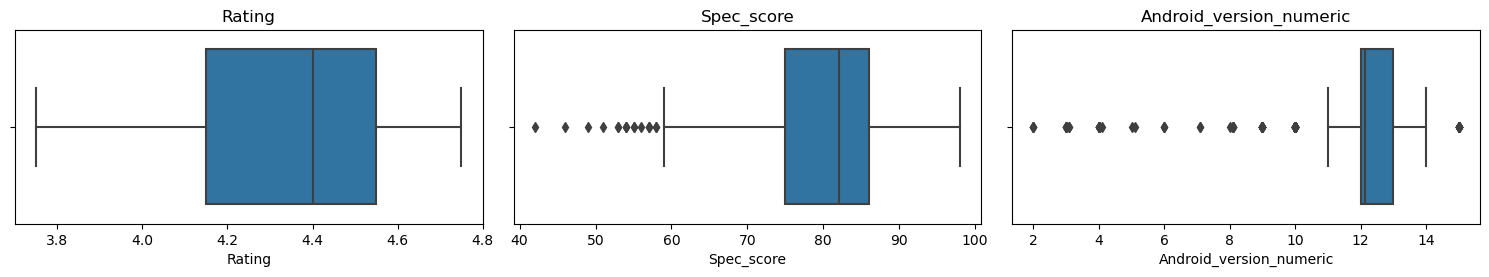

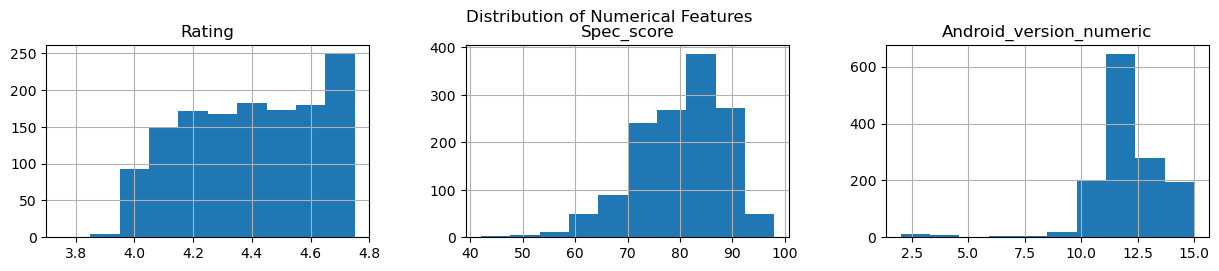

In [7]:
# Initialize the Data Visualization and Analysis class
eda= DataAnalysis(data)

numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data.select_dtypes(include=['object', 'bool']).columns
numeric_col_li = data.select_dtypes(include=['int64', 'float64']).columns.to_list()
numeric_cols = [col for col in numeric_col_li if col != 'Index']
eda.plot_boxplots(data, numeric_cols)
eda.plot_histograms(data, numeric_cols)

*Plot count plots to visualize column categories*

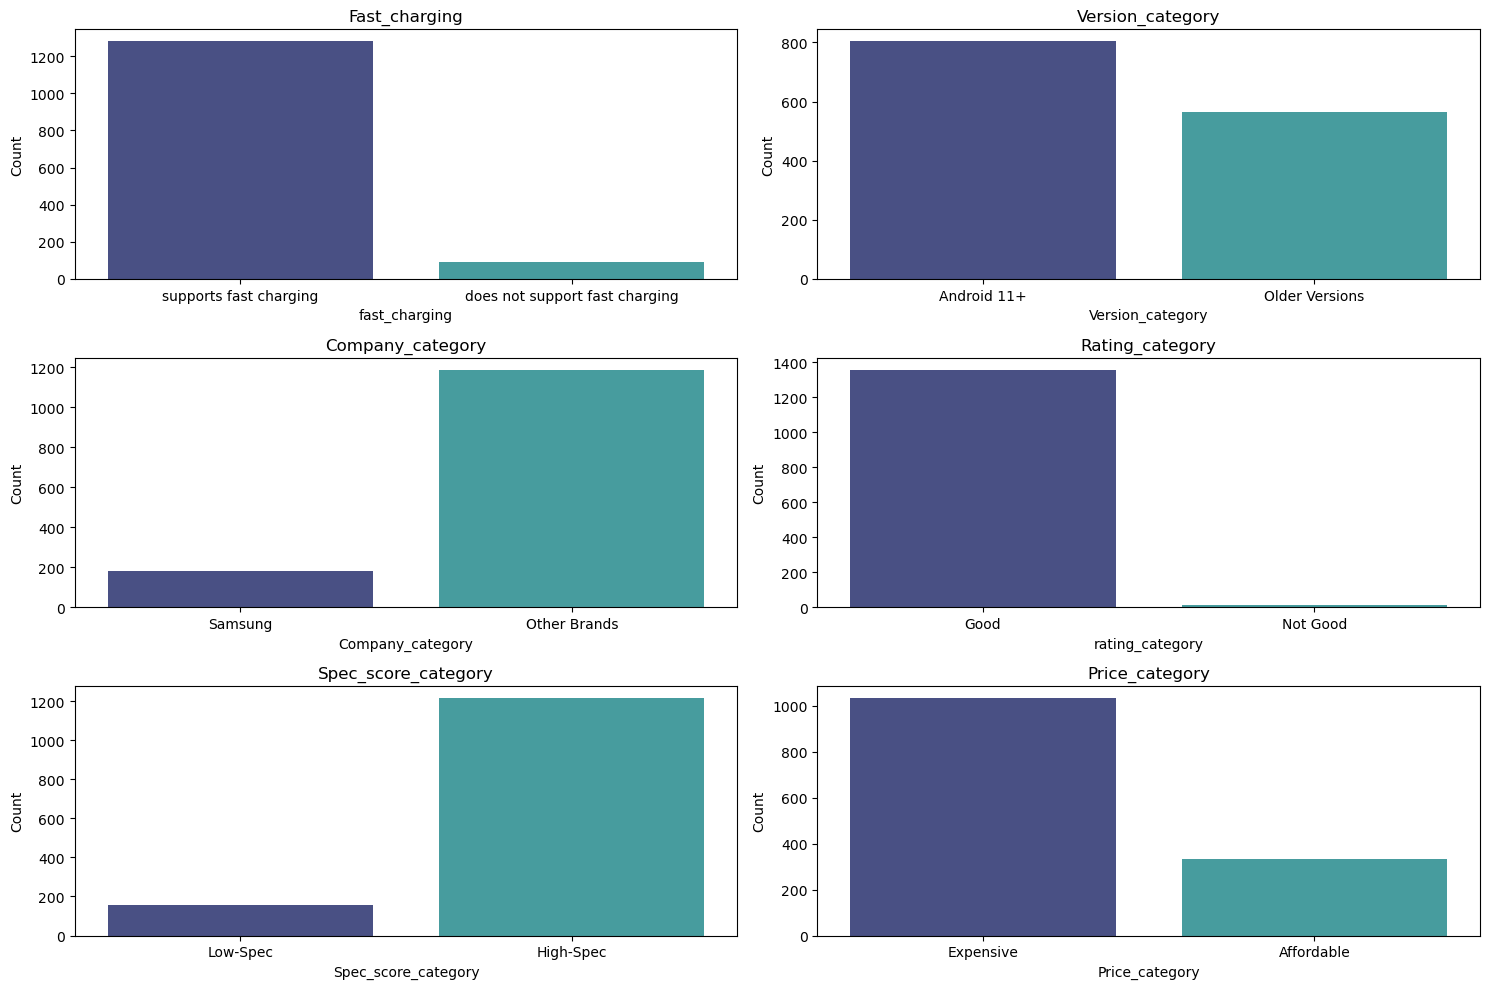

In [8]:
relevant_cols = ['fast_charging', 'Version_category', 'Company_category',
                 'rating_category', 'Spec_score_category', 'Price_category']

eda.plot_countplots(data, relevant_cols)

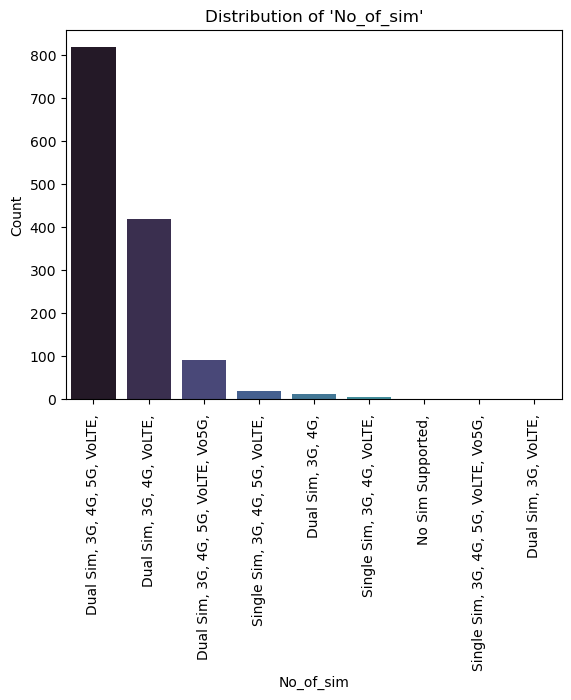

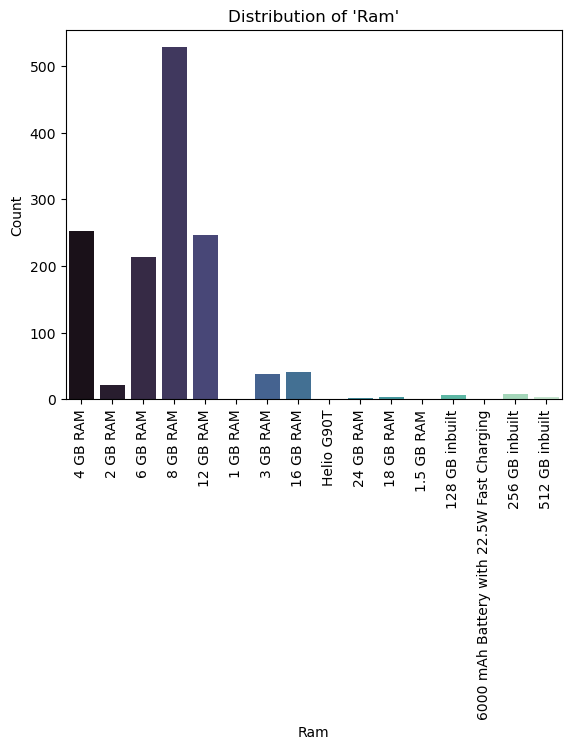

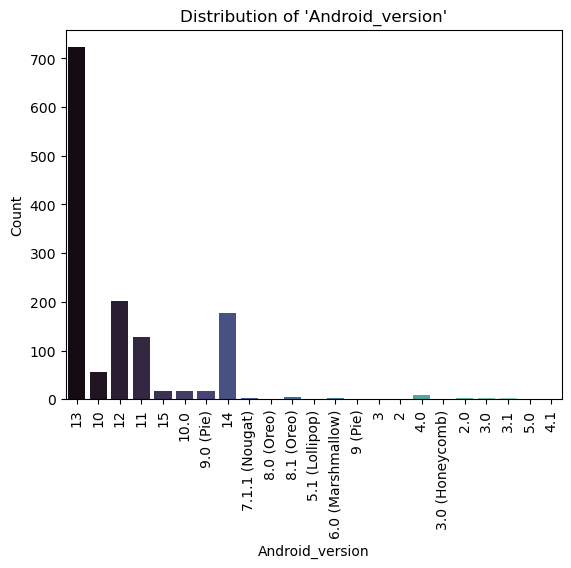

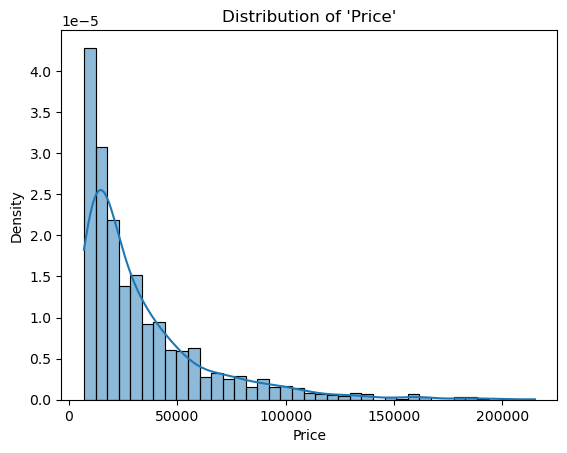

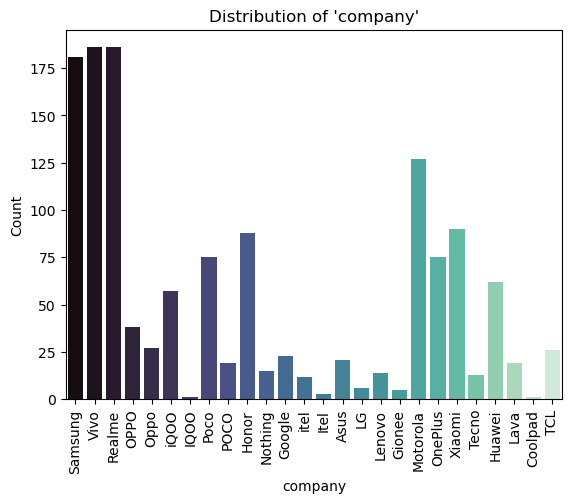

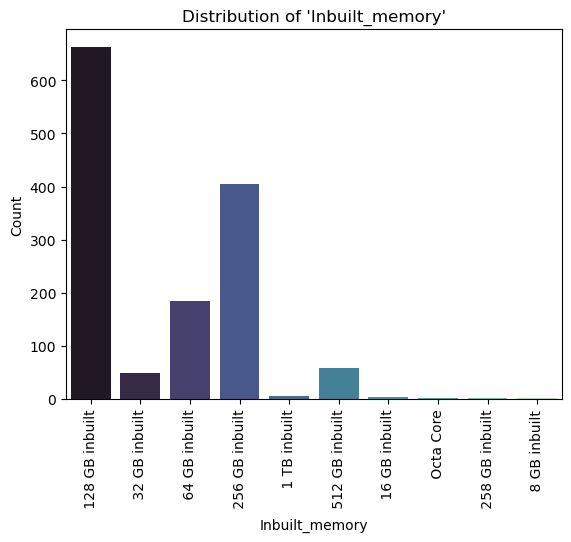

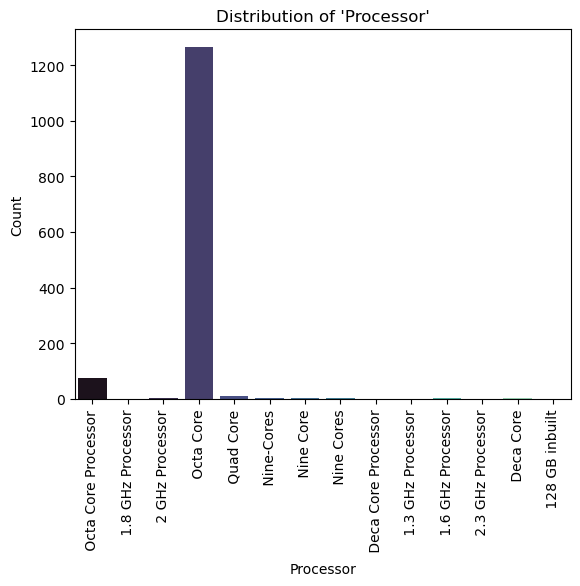

In [9]:
# List of columns to exclude
exclude = ['Index', 'fast_charging', 'Version_category', 'Company_category',
            'Rating', 'Spec_score', 'Android_version_numeric', 'Name',
            'Battery', 'Display', 'Camera', 'External_Memory', 'Screen_resolution',
            'Processor_name', 'Price_binary', 'Spec_score_binary', 'Rating_binary',
            'Spec_score_category', 'rating_category','Price_category', 'Android_version_cleaned']

# Call the function with the DataFrame and the list of columns to exclude
eda.check_normal_distribution(data, exclude_columns=exclude)


*Further feature Encoding for correlation analysis purposes*

In [10]:
# One-hot encode categorical variables
new_data = eda.encode_categorical_features(data)

In [11]:
new_data.columns

Index(['Index', 'Name', 'Rating', 'Spec_score', 'Display', 'Camera',
       'External_Memory', 'Android_version', 'Price', 'fast_charging',
       ...
       'Processor_ 2 GHz Processor', 'Processor_ 2.3 GHz Processor',
       'Processor_ Deca Core', 'Processor_ Deca Core Processor',
       'Processor_ Nine Core', 'Processor_ Nine Cores',
       'Processor_ Nine-Cores', 'Processor_ Octa Core',
       'Processor_ Octa Core Processor', 'Processor_ Quad Core'],
      dtype='object', length=187)

*Correlation Analysis*

The following columns were dropped due to being object types:
['Name', 'Display', 'Camera', 'External_Memory', 'Android_version', 'fast_charging', 'Screen_resolution', 'Processor_name', 'Android_version_cleaned', 'Version_category', 'rating_category', 'Spec_score_category', 'Price_category']
Correlation to Spec_score_binary


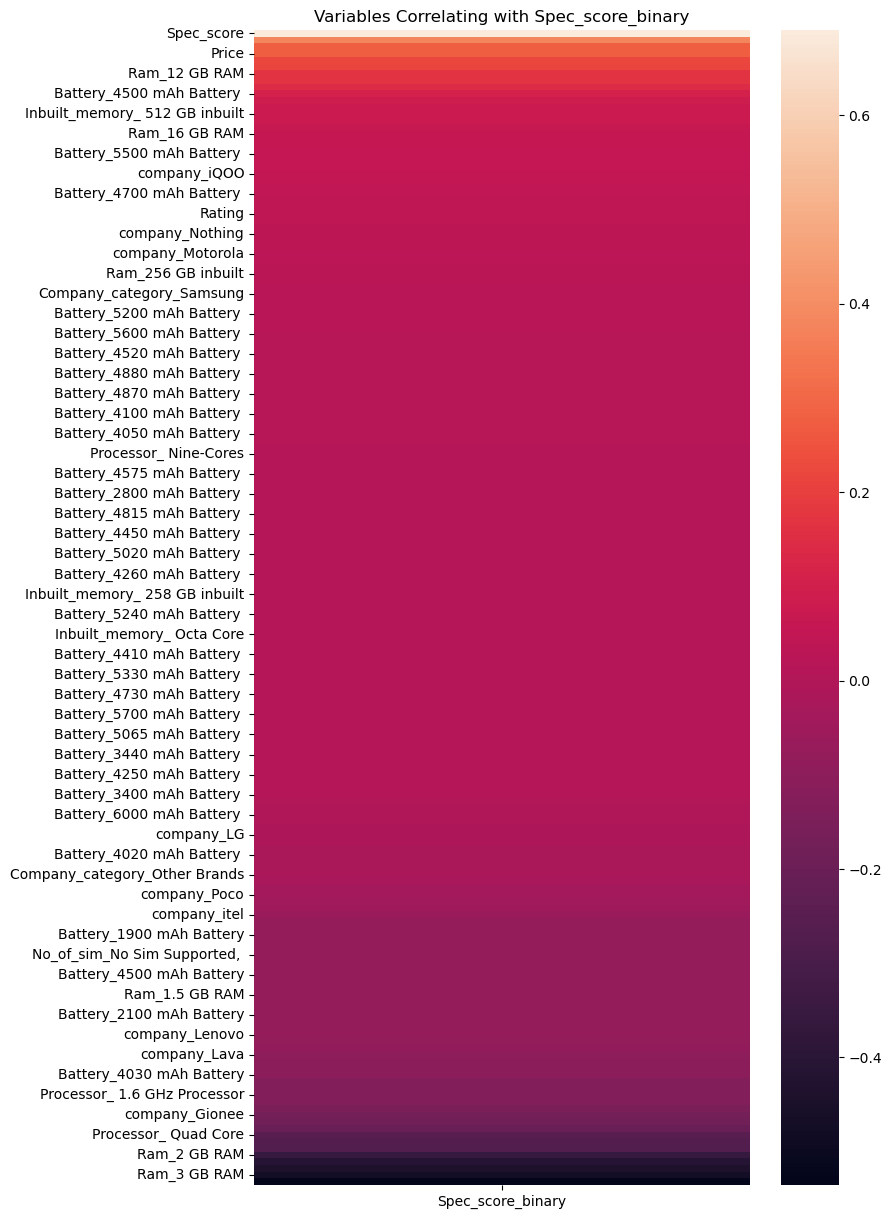

In [12]:
column_of_interest = 'Spec_score_binary'
spec_score_binary_corr = eda.correlation(new_data, column=column_of_interest, rank=False)

# Plotting the heatmap
if spec_score_binary_corr is not None:
    fig, ax = plt.subplots(figsize=(8, 15))
    sns.heatmap(spec_score_binary_corr.to_frame().sort_values(by=column_of_interest, ascending=False), annot=False, ax=ax)
    ax.set_title(f'Variables Correlating with {column_of_interest}')
    plt.show()
else:
    print(f'Correlation calculation failed for column: {column_of_interest}')

The following columns were dropped due to being object types:
['Name', 'Display', 'Camera', 'External_Memory', 'Android_version', 'fast_charging', 'Screen_resolution', 'Processor_name', 'Android_version_cleaned', 'Version_category', 'rating_category', 'Spec_score_category', 'Price_category']
Correlation to Price


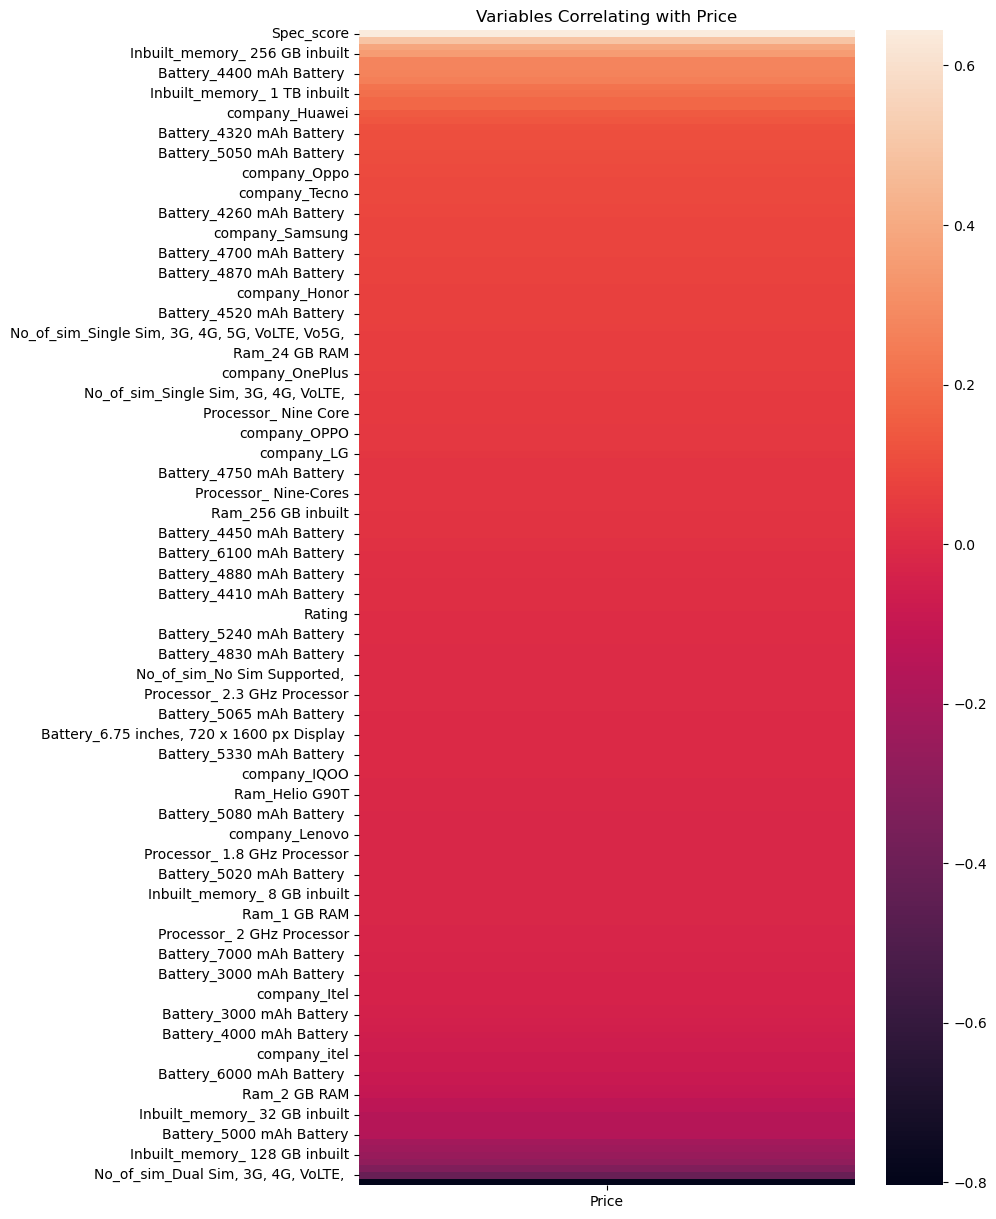

In [13]:
column_of_interest = 'Price'
price_corr = eda.correlation(new_data, column=column_of_interest, rank=False)

# Plotting the heatmap
if price_corr is not None:
    fig, ax = plt.subplots(figsize=(8, 15))
    sns.heatmap(price_corr.to_frame().sort_values(by=column_of_interest, ascending=False), annot=False, ax=ax)
    ax.set_title(f'Variables Correlating with {column_of_interest}')
    plt.show()
else:
    print(f'Correlation calculation failed for column: {column_of_interest}')

The following columns were dropped due to being object types:
['Name', 'Display', 'Camera', 'External_Memory', 'Android_version', 'fast_charging', 'Screen_resolution', 'Processor_name', 'Android_version_cleaned', 'Version_category', 'rating_category', 'Spec_score_category', 'Price_category']
Correlation to Price_binary


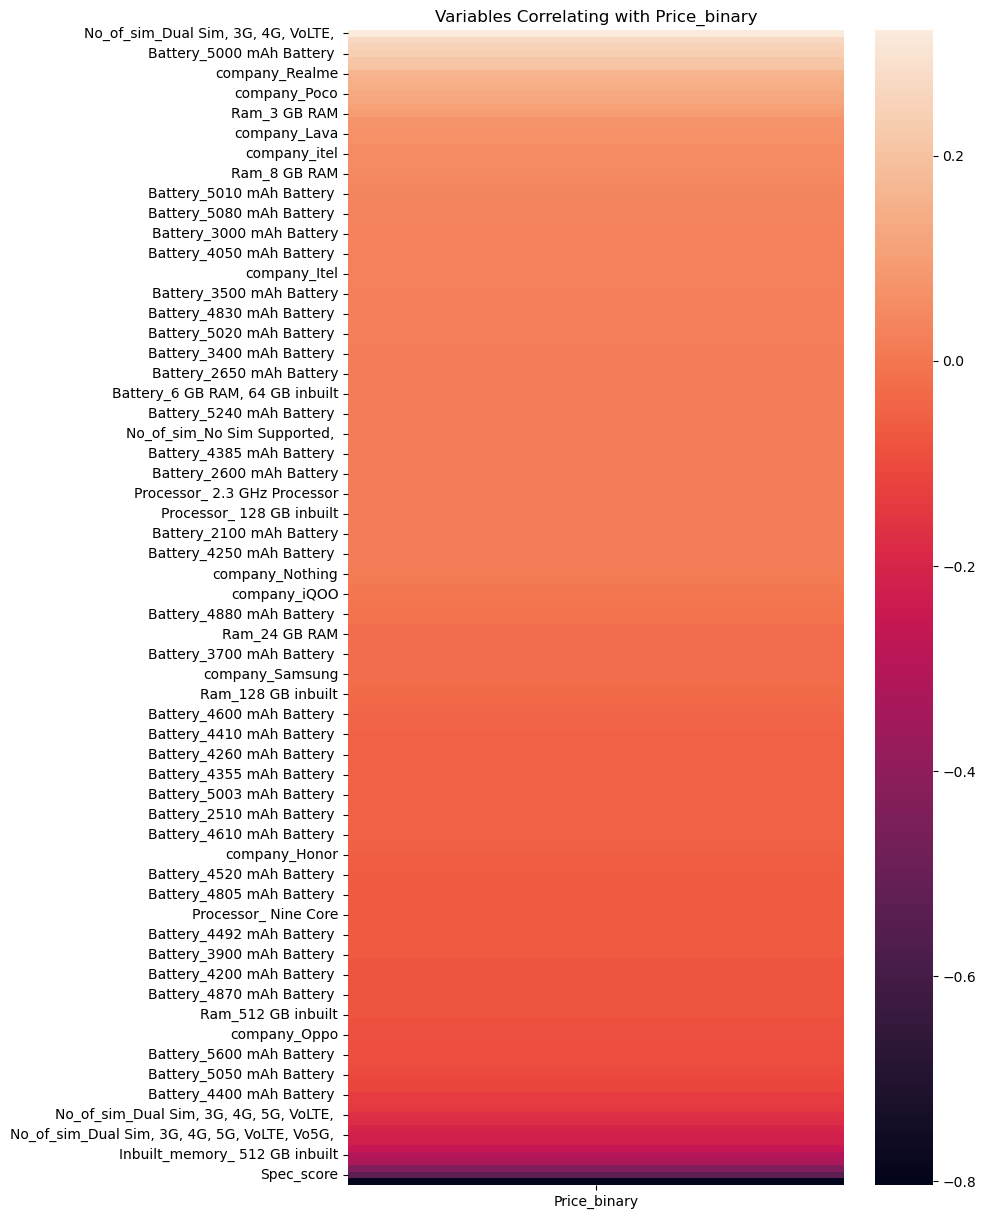

In [14]:
column_of_interest = 'Price_binary'
price_corr = eda.correlation(new_data, column=column_of_interest, rank=False)

# Plotting the heatmap
if price_corr is not None:
    fig, ax = plt.subplots(figsize=(8, 15))
    sns.heatmap(price_corr.to_frame().sort_values(by=column_of_interest, ascending=False), annot=False, ax=ax)
    ax.set_title(f'Variables Correlating with {column_of_interest}')
    plt.show()
else:
    print(f'Correlation calculation failed for column: {column_of_interest}')

# **Data Modelling**
---


*Drop columns for modelling purposes*

In [15]:
# Drop columns no longer applicable in this section
object_columns = new_data.select_dtypes(include=['object'])
obj_col_list = object_columns.columns.tolist()

eda.drop_columns(new_data, obj_col_list)

*Model the data*
### **Base Model - Phone Specification Categorizer (High-Spec or Low-Spec)**
---

*Initialize the Data Modeling class*

In [16]:
mod = DataModeling(new_data)

*Split the data into training and testing sets*

In [17]:
# Base Model
# Split the data into features and Spec_score_binary
X_train, X_test, y_train, y_test= mod.split_data(new_data, 'Spec_score_binary')

In [18]:
X_train.shape

(959, 173)

In [19]:
y_train.shape

(959,)

In [20]:
mod.modelplotting_evaluation(X_train, X_test, y_train, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[ 27   7]
 [  7 370]]

Classification report:               precision    recall  f1-score   support

           0       0.79      0.79      0.79        34
           1       0.98      0.98      0.98       377

    accuracy                           0.97       411
   macro avg       0.89      0.89      0.89       411
weighted avg       0.97      0.97      0.97       411

Accuracy: 0.9659367396593674
Precision: 0.9814323607427056
Recall: 0.9814323607427056
F1 score: 0.9814323607427056
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.95833333 0.92708333 0.94791667 0.953125   0.96335079]
Mean CV Accuracy: 0.9499618237347296

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
-------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.965937,0.981432,0.981432,0.981432
1,DecisionTreeClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier(),0.922141,0.962865,0.952756,0.957784


*Apply SMOTE to deal with class imbalance*

In [21]:
X_train_resampled, y_train_resampled = mod.apply_smote(X_train, y_train)

In [22]:
mod.modelplotting_evaluation(X_train_resampled, X_test, y_train_resampled, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[ 30   4]
 [ 13 364]]

Classification report:               precision    recall  f1-score   support

           0       0.70      0.88      0.78        34
           1       0.99      0.97      0.98       377

    accuracy                           0.96       411
   macro avg       0.84      0.92      0.88       411
weighted avg       0.97      0.96      0.96       411

Accuracy: 0.9586374695863747
Precision: 0.9891304347826086
Recall: 0.9655172413793104
F1 score: 0.9771812080536914
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.91156463 0.94897959 0.95238095 0.94197952 0.97952218]
Mean CV Accuracy: 0.9468853753105337

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
-------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.958637,0.965517,0.989130,0.977181
1,DecisionTreeClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier(),0.861314,0.872679,0.973373,0.920280


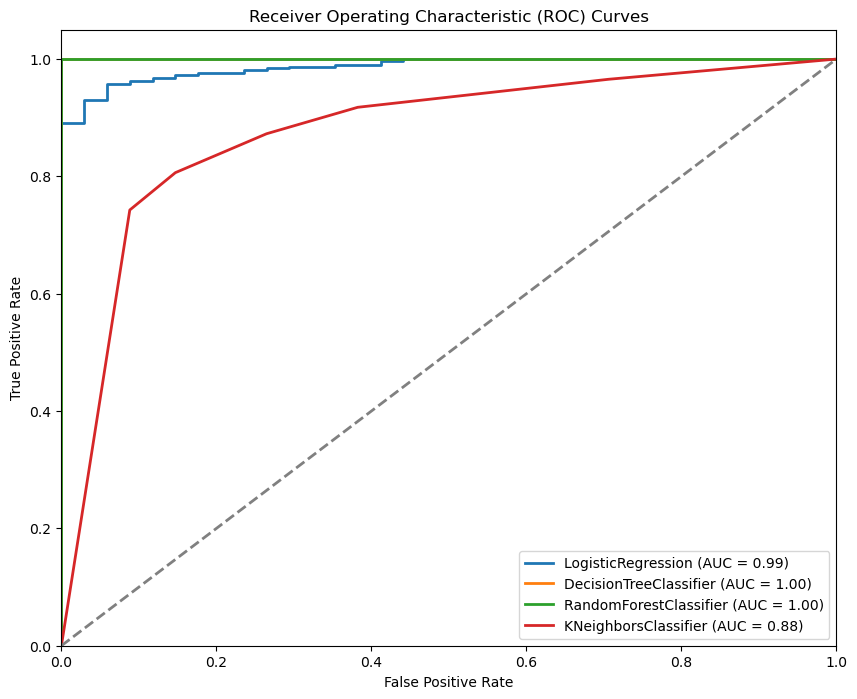

In [23]:
models = [mod.lr, mod.dc, mod.rf, mod.knn]

mod.plot_roc_curves(models,X_train_resampled, y_train_resampled, X_test, y_test)

### **Model 2 - Price Categorizer (Expensive or Affordable)**
---

In [24]:
X_train, X_test, y_train, y_test= mod.split_data(new_data, 'Price_binary')
mod.modelplotting_evaluation(X_train, X_test, y_train, y_test)

Model: LogisticRegression(random_state=42)
--------------------------------------------------------------------------------
Confusion matrix:

 [[ 92   2]
 [  5 312]]

Classification report:               precision    recall  f1-score   support

           0       0.95      0.98      0.96        94
           1       0.99      0.98      0.99       317

    accuracy                           0.98       411
   macro avg       0.97      0.98      0.98       411
weighted avg       0.98      0.98      0.98       411

Accuracy: 0.9829683698296837
Precision: 0.9936305732484076
Recall: 0.9842271293375394
F1 score: 0.9889064976228209
--------------------------------------------------------------------------------

Cross-Validation Scores: [0.99479167 0.99479167 0.99479167 0.98958333 0.9947644 ]
Mean CV Accuracy: 0.9937445462478186

--------------------------------------------------------------------------------
Model: DecisionTreeClassifier(random_state=42)
-------------------------------------

,Model,Accuracy,Recall,Precision,F1
0,LogisticRegression(random_state=42),0.982968,0.984227,0.993631,0.988906
1,DecisionTreeClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
2,RandomForestClassifier(random_state=42),1.000000,1.000000,1.000000,1.000000
3,KNeighborsClassifier(),0.995134,0.996845,0.996845,0.996845


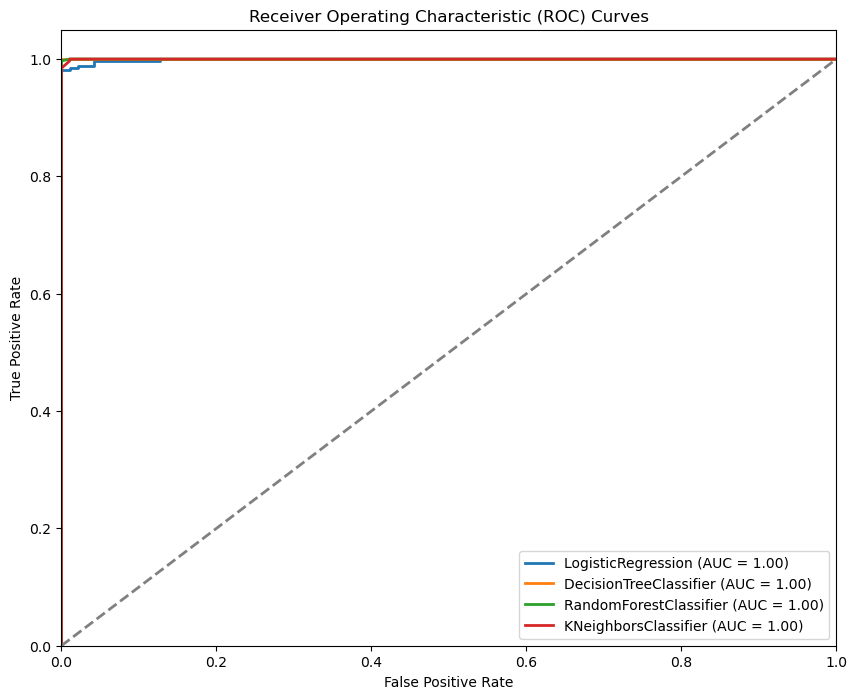

In [25]:
models= [mod.lr, mod.dc, mod.rf, mod.knn]

mod.plot_roc_curves(models, X_train, y_train, X_test, y_test)

# **Evaluation**
---
### **Base Model - Phone Specification Categorizer (High-Spec or Low-Spec)**
---
* The base model includes `logistic regression`, `decision tree`, `random forest`, and `k-neighbors classifiers`.

* `All models` perform well, with high accuracy and recall.

* The `decision tree` and `random forest` achieve perfect accuracy (1.0).
### **Model 2 - Price Categorizer (Expensive or Affordable)**
---
- Similar to the base model, `all classifiers` perform exceptionally well.

- `Decision tree` and `random forest` achieve perfect accuracy (1.0).

### **Metrics Justification:**
- **Accuracy**: Measures overall correctness but may not be sensitive to class imbalances.

- **Recall**: Important for identifying true positives (e.g., correctly predicting high-spec phones).

- **Precision**: Relevant for minimizing false positives (e.g., not misclassifying low-spec phones as high-spec).

- **F1 Score**: Balances precision and recall.

### **Final Model Recommendation:**
- Considering the business context, I recommend using the **Decision Tree Classifier** for both the **Phone Specification Categorizer** and **Price Categorizer**.

- It achieves perfect accuracy and is interpretable.

### **Implications:**
---
- By predicting whether a phone is high-spec or low-spec, Samsung can:

    - Optimize marketing strategies for each category.

    - Allocate resources effectively for the upcoming new product.📱

    - Enhance customer satisfaction by focusing on key features.